# Example numerical solution of a RLC circuit, for the free response case.


In [6]:
from scipy import integrate  # for ODE solution
from pylab import *  # for plotting commands

# Parameters
R_0 = 560.  # Ohm
L = 0.1  # 100 mH
C = 0.1e-6  # 0.1 microF
u_c0 = 100  # V, initial voltage accross C

In [7]:
def rlc(A, t):
    """The function that encodes the dynamics of the RLC circuit."""
    x_1, x_2 = A  # x_1 represents i, x_2 represents di/dt
    rhs = array([x_2, (-1/(L*C)*x_1 - R/L*x_2)])
    return rhs

initial_conditions = [0, u_c0/L]  # Pay attention to the initial conditions

# Simulation period: time spans around 2 ms, divided in 1000 intervals
time = linspace(0.0, 2e-3, 1001)

# Compute and plot the current for a set of resistor values

<>:6: SyntaxWarning: invalid escape sequence '\O'
<>:6: SyntaxWarning: invalid escape sequence '\O'
/var/folders/yx/fcxt52hx1zb_n0dk8lnwc20r0000gn/T/ipykernel_8478/3231564055.py:6: SyntaxWarning: invalid escape sequence '\O'
  legend_names = ["$R=%.0f \Omega$" % r for r in R_list] # for plotting


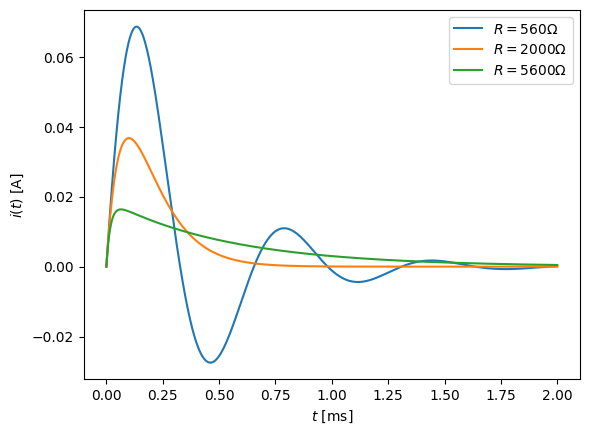

In [8]:
# Create a figure environment for plotting.
figure()

# List of resistor values we are going to simulate 
R_list = [R_0, 2000, 10*R_0]
legend_names = ["$R=%.0f \Omega$" % r for r in R_list] # for plotting

for r in R_list:
    R = r  # Global variable, changes value used in rlc()
    # This is where the solution takes place.
    i, di = integrate.odeint(rlc, initial_conditions, time).T
    # i now contains the evolution of the current
    # di now contains the evolution of the time derivative of the current
    plot(1000*time, i)

# Plot formating
legend(legend_names)
xlabel('$t$ [ms]')
ylabel('$i(t)$ [A]')
show()


# Let's redo the same to get the voltage accross the inductor

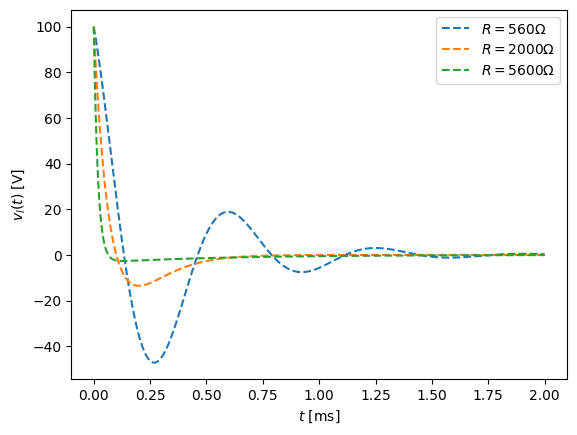

In [9]:
for r in R_list:
    R = r
    i, di = integrate.odeint(rlc, initial_conditions, time).T
    # Obtain the voltage
    v_l = L*di
    plot(1000*time, v_l, '--')

# Plot formating
legend(legend_names)
xlabel('$t$ [ms]')
ylabel('$v_l(t)$ [V]')
show()
